In [1]:
%pylab inline
from Bio import Phylo
from io import StringIO
import ete3
from importlib import reload
from scipy.optimize import curve_fit

sys.path.append('./methods/')
import tree_methods
import sum_exp_methods as em

Populating the interactive namespace from numpy and matplotlib


In [2]:
def sum_exp(x,*params):
    L = len(params)
    assert L%2==0
    coeffs = params[:L//2]
    lens = params[L//2:]
    return sum([coeffs[i]*(1-exp(-x/l)) for i,l in enumerate(lens)],axis=0)

## Sum of exponentials fit to power law

In [11]:
xfit = linspace(0,1000,1000)
alpha = .5
y = xfit**alpha
k = 3 # number of exponentials
popt,_ = curve_fit(sum_exp,xfit,y,p0=ones(2*k))

L = len(popt)
coeff_list = popt[:L//2]
corr_len_list = popt[L//2:]

## Sum of Additive and Independent

In [20]:
reload(em)
reload(tree_methods)

N = 10000
U = 1e-3
add = .1
ind = .6

mf = []
RE = em.RandomEvo_Exp(N,U,ind*ones(1),.001*ones(1),seed=2,additive=add)
RE.run_evo(500)

Text(0, 0.5, 'mean fitness')

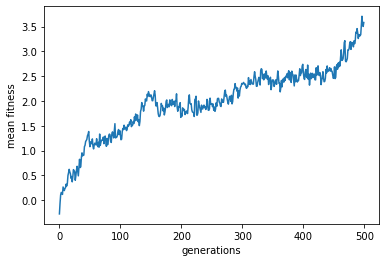

In [21]:
plot(RE.mean_fitness)
xlabel('generations')
ylabel('mean fitness')

# Vary ratio

In [54]:
reload(em)
reload(tree_methods)

N = 10000
U = 1e-3
add = .1

mf = []

for ind in arange(0,1,.1):
    RE = em.RandomEvo_Exp(N,U,ind*ones(1),.001*ones(1),seed=5,additive=add)
    RE.run_evo(10000)
    mf.append(RE.mean_fitness)

Text(0, 0.5, 'mean fitness')

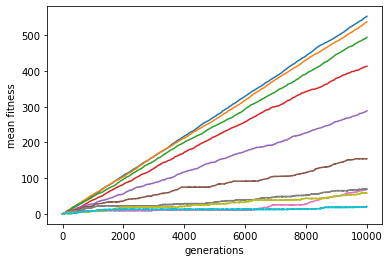

In [55]:
for f in mf:
    plot(f)
xlabel('generations')
ylabel('mean fitness')

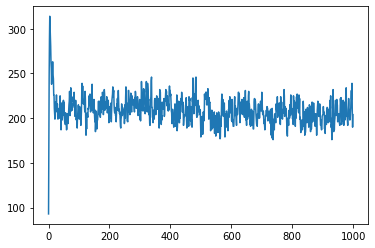

In [4]:
plot(RE.num_active_classes)

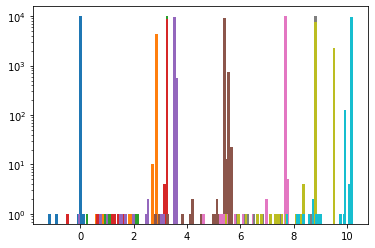

In [53]:
for idx in linspace(0,len(RE.s_dist_traj)-1,10):
    dist = RE.s_dist_traj[int(idx)]
    x = []
    y = []
    for j in dist:
        x.append(j)
    #     print(j)
        y.append(dist[j])
    bar(x,y,width=.1)
yscale('log')

In [22]:
tree_string = RE.get_final_newick(mutations=False)
T = ete3.Tree(tree_string,format=1)

TS = ete3.TreeStyle()
TS.scale=4
TS.branch_vertical_margin=4
TS.show_leaf_name=False

for n in T.traverse():
    nstyle=ete3.NodeStyle()
    if len(n.get_children())==0:
        nstyle["size"]=1
    else:
        nstyle["size"]=0
    n.set_style(nstyle)


T.ladderize()
T.render('final_newick.pdf',tree_style=TS);